
# Comparative study of K-means Clustering algorithms, Agglomerative Hierarchical Clustering and DBSCAN.



We will study the algorithms of K-means Clustering, Agglomerative Hierarchical Clustering and DBSCAN, applied to 3 vectorial datasets. The objective is to contrast these 3 algorithms and determine advantages and disadvantages in each case study. In addition, analyze the impact of the choice of parameters and measures of proximity.


## 1. Dataset


We will use 3 files:
1.  **Spiral.tx**; : $N=312, D=2$
2.  **R15.tx**; : $N=600, D=2$
3.  **cute-t2-4k.tx**; : $ N=4200, D=2$

 Each corresponding to a two-dimensional vector dataset, where each row of the file has the format: $x_1$\t$x_2$. Being $x_1$ and $x_2$ the attributes of each data $X^{(i)}$ $\in \mathbf{R} ^{2}$ .

 The datasets have a number of points of 312, 600 and 4200 respectively.


In [1]:
# Libreries
from sklearn.cluster import DBSCAN
import sklearn.cluster as skl

# from sklearn import manifold
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
import scipy
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


In [2]:
# data_array: Function that returns an np.array of size [n, D]
# Parámetros: file -> file name

# data_plot: Function that generates a graph of the dataset
# specified in the file parameter


def data_array(file):
    data = np.loadtxt(file)
    return data


def data_plot(file):
    data = data_array(file)
    plt.title("Dataset")
    plt.xlabel("x_1")
    plt.ylabel("x_2")
    plt.plot(data[:, 0], data[:, 1], "ob", color="c")
    plt.show()


# Example of using the interact function
interact(data_plot, file=["Spiral.txt", "R15.txt", "cure-t2-4k.txt"])


interactive(children=(Dropdown(description='file', options=('Spiral.txt', 'R15.txt', 'cure-t2-4k.txt'), value=…

<function __main__.data_plot(file)>

## 2. K-Means

1. We will apply the K-Means algorithm to each of the datasets, using Euclidean distance as a measure of proximity.
2. We will make a graph for each dataset where each cluster obtained and its centroids are clearly distinguished.
3. We will answer the following questions:
    >a. On which dataset do you get a better result using this algorithm? Why?
        >>**Answer:** The best result is obtained in the "R15" dataset. This is due to the fact that the clusters have similar sizes, in addition, shapes close to circles, with such characteristics the k-means algorithm is favored, since each centroid will be clearly defined in the center of these clusters. In the Spiral dataset, we have spiral structures, k-means fails to recognize complex structures, since each centroid is evaluated with respect to a data set in a radius, it does not consider the relationship between the different points, it only considers the distance of each point to its centroid. In the cure-t2-4k dataset it fails, since oval figures appear, and others circular, that is, the geometry of the clusters is different, in addition, the size of the clusters is very different, which causes large clusters tend to be divided into pieces, since, for k-means, it is more convenient to separate a large cluster into several and assign a centroid to each piece than to assign that centroid to a smaller cluster, where the "reward" is smaller.

    >b. What value of k (number of centroids) gives a better result for each of the datasets? What method could be used to determine an optimal value for k?
        >>**Answer:** It is complex to define which is the best value of k for the data set Spiral and Cure-t2, since the algorithm fails to adjust either of them well, however, for the data set Spiral we could define that the The best k will be the one that does not put 2 different cluster points (of the optimal solution) in the same cluster. This begins to happen for values ​​of k=27 onwards, however, we do have points that should be in the same cluster. but in the solution they are in different clusters. One option to find the optimal solution would be to build the clusters in a spiral shape with each of these small clusters. For the dataset cure-t2-4k we find ourselves in the same situation, by the same criteria used in the previous point, a value of k=8 manages to separate the clusters, however, some of the clusters of the optimal solution are divided into 2 or more smaller clusters, one option to find the final solution would be to join these smaller clusters into a larger one with the help of another algorithm. For dataset R15 the optimal solution is given for k = 3.

 To find the optimal value of k we could use coefficients such as ELBOW and Silhouette. In addition, using them together allows us to limit the options of possible optimal k.


In [3]:
def plot_clusters(data, title, alg, k=1, eps=1, min_samples=1, linkage="complete"):
    data = data_array(data)
    if alg == "kmeans":
        result = skl.KMeans(n_clusters=k).fit(data)
    elif alg == "dbscan":
        result = skl.DBSCAN(eps=eps, min_samples=min_samples).fit(data)
        k = len(set(result.labels_))
    else:
        result = skl.AgglomerativeClustering(linkage=linkage, n_clusters=k).fit(data)
    for i in range(k):
        cluster = np.take(data, np.argwhere(result.labels_ == i), axis=0)[:, 0]
        plt.scatter(cluster[:, 0], cluster[:, 1], color=plt.cm.Spectral((i / k)))
    plt.title(title)
    plt.show()


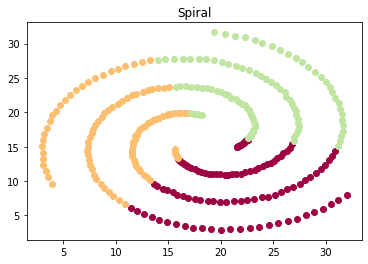

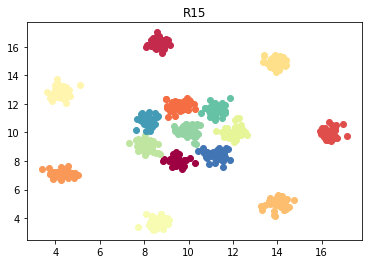

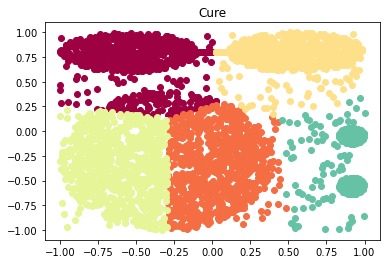

In [4]:
plot_clusters("Spiral.txt", "Spiral", "kmeans", k=3)
plot_clusters("R15.txt", "R15", "kmeans", k=15)
plot_clusters("cure-t2-4k.txt", "Cure", "kmeans", k=5)


In [5]:
interact(
    plot_clusters,
    data=["Spiral.txt", "R15.txt", "cure-t2-4k.txt"],
    k=widgets.IntSlider(min=1, max=30, step=1, value=3),
    eps=fixed(0),
    min_samples=fixed(0),
    linkage=fixed(0),
    title=fixed("result"),
    alg="kmeans",
)


interactive(children=(Dropdown(description='data', options=('Spiral.txt', 'R15.txt', 'cure-t2-4k.txt'), value=…

<function __main__.graficar_clusters(data, title, alg, k=1, eps=1, min_samples=1, linkage='complete')>

## 3. DBSCAN

1. We will apply the DBSCAN algorithm to each of the datasets.
2. We will make a graph for each dataset where each cluster obtained is clearly distinguished.
3. We will answer the following questions:
    > a. On which dataset do you get a better result using this algorithm? Why?
    >>**Answer:** In the Spiral and R15 data sets. Like Kmeans, >DBSCAN considers a radial distance to find the belonging of two points to the same cluster, however, unlike Kmeans that only considers the distance to a centroid, DBSCAN has the advantage of considering the distance in a specified radius. for each of the points in a cluster, this allows you to identify clusters with more varied shapes, as long as the clusters are clearly separated. The above is true for the Spiral and R15 datasets, however for the cure-t2-4k dataset we have two oval clusters that are joined by a bridge of points, which causes DBSCAN to move from one cluster to the other, uniting them into a single cluster.  
    
    > b. What parameters of Pts and minPts give the best result for each graph? What strategy could we use to choose these parameters?
    >> **Answer:** There are multiple values ​​that deliver optimal results. For the Spiral dataset, min_samples = 2,eps = 2; for R15, min samples = 10, eps = 0.4; for cure-t2-4k, min_samples = 4, eps = 0.08. In the most complex dataset for this algorithm, cure-t2-4k, it was considered that the best parameters are those that manage to separate the largest number of visually recognizable clusters, which led to some outliers being considered separate clusters. We could use the Silhouette coefficient to choose these parameters, with this coefficient we measure the congruence of each point to its assigned cluster, that is, the distance to all the points of its same cluster weighted to the size of the cluster, and the congruence to other clusters , we select the minimum of the distances to all the other clusters to which it was not assigned. The objective is to find the parameters that increase the congruence (that is, that decrease a(i)) of each point with the points of its same cluster and increase the minimum congruence of each point to the clusters that were not assigned. The Silhouette coefficient makes the difference between the congruences. We look for the highest value of congruence (that is, the highest value for s(i)).



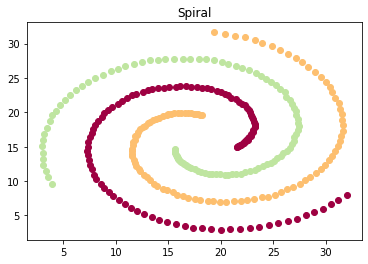

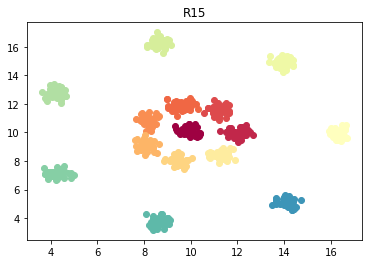

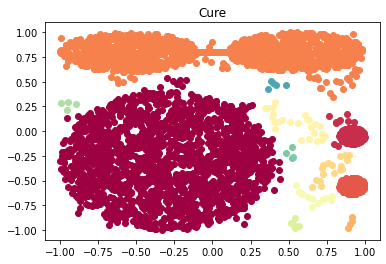

In [6]:
# Implementación
plot_clusters("Spiral.txt", "Spiral", "dbscan", min_samples=2, eps=2)
plot_clusters("R15.txt", "R15", "dbscan", min_samples=10, eps=0.4)
plot_clusters("cure-t2-4k.txt", "Cure", "dbscan", min_samples=4, eps=0.08)


In [7]:
interact(
    plot_clusters,
    data=["Spiral.txt", "R15.txt", "cure-t2-4k.txt"],
    k=fixed(1),
    eps=widgets.FloatSlider(min=0.0, max=10.0, step=0.1, value=2),
    min_samples=widgets.IntSlider(min=1, max=30, step=1, value=2),
    linkage=fixed("single"),
    title=fixed("result"),
    alg=fixed("dbscan"),
)


interactive(children=(Dropdown(description='data', options=('Spiral.txt', 'R15.txt', 'cure-t2-4k.txt'), value=…

<function __main__.graficar_clusters(data, title, alg, k=1, eps=1, min_samples=1, linkage='complete')>

## 4. Hierarchical Agglomerative Clustering


## 4. Hierarchical Agglomerative Clustering


1. Aplicaremos el algoritmo HAC a cada uno de los datasets, utilizando tanto single link como complete link. Puede escoger la cantidad de cluster que estime conveniente. 
2. Realizaremos una gráfica para cada dataset donde se distinga claramente cada cluster obtenido.
3. Responderemos a las siguientes preguntas: 

    > a. ¿En cuál dataset se obtiene un mejor result utilizando este algoritmo? ¿Por qué? 
    >> **Respuesta:** El mejor result se obtiene en el dataset Spiral. En este dataset los clusters están claramente separados, por lo que al aglomerar clusters los conjuntos escogidos están claramente definidos por la mínima distancia entre clusters, por otro lado, si utilizamos la máxima distancia llega un punto en que la distancia recorrida de una espira de la espiral es superior a la distancia entre espiras, por lo qué, el result no es el deseado. En el dataset R15 el result es casi óptimo al utilizar linkage complete, sin embargo, existe un error en los clusters centrales, algunos puntos son clasificados en el cluster más lejano (en términos de mínima distancia), ya que los clusters correctos tienen un punto más lejano de los puntos que serán aglomerados. En el dataset cure-t2-4k los clusters están bien separados, sin embargo, la separación de los clusters tiene datos outliers lo que genera un puente entre clusters anulando la distancia que separa los clusters y provocando que HAC otorgue un mal result.
      
    > b. ¿En cuál o cuáles datasets se obtiene un mejor result para HAC utilizando single-link? ¿Por qué?  
    >> **Respuesta:** Se obtiene el mejor result utilizando single-link en el dataset Spiral, ya que, la distancia entre los puntos de cada espira es siempre menor que la distancia entre las espiras, en cambio, en los otros dataset, existen pares de puntos dentro de los clusters a identificar, tal que, su mínima distancia es mayor a la distancia entre clusters, lo que genera que el algoritmo no logre identificar los clusters correctamente.
    

1. We will apply the HAC algorithm to each of the datasets, using both single link and complete link. You can choose the number of clusters you deem convenient.
2. We will make a graph for each dataset where each cluster obtained is clearly distinguished.
3. We will answer the following questions:
    > a. In which dataset do you get a better result using this algorithm? Why?
    >> **Answer:** The best result is obtained in the Spiral dataset. In this dataset the clusters are clearly separated, so when agglomerating clusters the chosen sets are clearly defined by the minimum distance between clusters, on the other hand, if we use the maximum distance there comes a point where the distance traveled by one loop of the spiral is greater than the distance between turns, so the result is not the desired one. In dataset R15 the result is almost optimal when using linkage complete, however, there is an error in the central clusters, some points are classified in the furthest cluster (in terms of minimum distance), since the correct clusters have a point furthest from the points to be clustered. In the cure-t2-4k dataset, the clusters are well separated, however, the separation of the clusters has data outliers, which generates a bridge between clusters, canceling the distance that separates the clusters and causing HAC to give a bad result.

    > b. In which dataset(s) do you get a better result for HAC using single-link? Why?
    >> **Answer:** The best result is obtained using single-link in the Spiral dataset, since the distance between the points of each spiral is always less than the distance between the spirals, while in the other datasets there are pairs of points within the spirals. clusters to identify, such that its minimum distance is greater than the distance between clusters, which means that the algorithm fails to identify the clusters correctly.


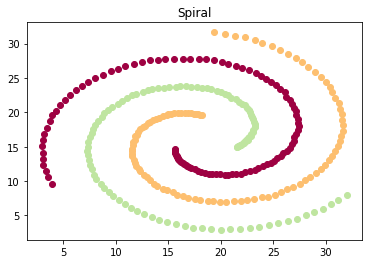

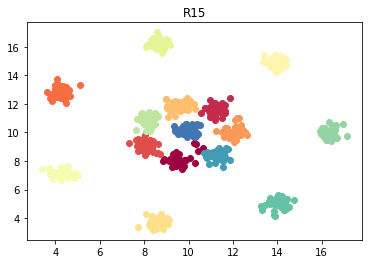

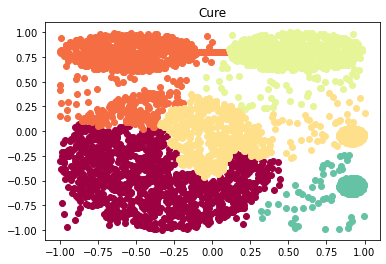

In [9]:
# Implementación
plot_clusters("Spiral.txt", "Spiral", "hac", k=3, linkage="single")
plot_clusters("R15.txt", "R15", "hac", k=15, linkage="complete")
plot_clusters("cure-t2-4k.txt", "Cure", "hac", k=5, linkage="complete")


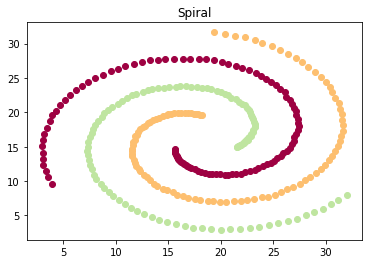

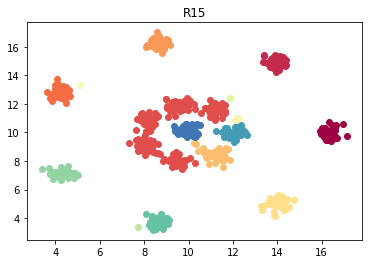

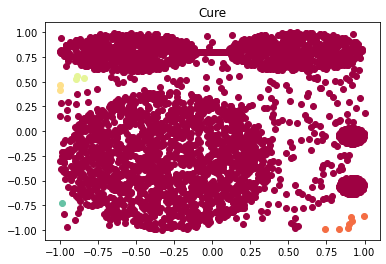

In [23]:
# Implementación
plot_clusters("Spiral.txt", "Spiral", "hac", k=3, linkage="single")
plot_clusters("R15.txt", "R15", "hac", k=15, linkage="single")
plot_clusters("cure-t2-4k.txt", "Cure", "hac", k=5, linkage="single")



## 5. Conclusions



Analyzing the graphs obtained, we can answer the following questions:

>  a. Which algorithm delivered a better result for each dataset?
>> **Response:**
>>>
| Data set | Best Algorithms |
|-------|-------|
| Spiral | DBSCAN, HAC |
| R15 | K-Means |
| Cure-t2-4k | DBSCAN (none managed to solve the task optimally) |

>>>
| Algorithm | Advantages | Disadvantages |
|-------|-------|-------|
| K-Means | It recognizes very well clusters with circular shapes of similar size. Good detection of clusters of different densities | It fails when there are clusters of different sizes. It presents difficulties with non-circular clusters, or complex shapes such as loops. We have to find the most suitable value of K |
| DBSCAN | Detect clusters of any shape. Detect clusters of different densities. | Fails when clusters are joined by outliers. Outlier points are not assigned to any cluster, even though some might belong to a specific cluster. |
| HACs | Detect clusters of complex shapes. | It is sensitive to outliers that can generate bridges between different clusters. Find the most suitable value of K. You have to find the most suitable type of linkage |

>  b. Which algorithm delivered the worst result for each dataset?
>> **Response:**
>>>
 | Data set | Worst Algorithm | Justification |
 |-------|-------|-------|
 | Spiral | K-Means | The algorithm is not capable of recognizing complex shapes, since the metric and procedure used to calculate the clusters only considers one point as a representative of the cluster, so it will only be able to correctly detect circular or similar shapes. Each of the points of each loop in the dataset extends away from the centroid, so it is not possible to detect these clusters from a single point and the distance to it.
 | R15 | HACs | The center clusters are very close together, when using complete it fails with some points, since any point of the correct clusters that are very far from the rest of the points would increase the maximum distance to the cluster of a point to assign, this causes that some points are assigned to an incorrect cluster. |
 | Cure-t2-4k | K-Means | The clusters have different sizes, therefore, if a large cluster is divided into two equal parts and these parts have a size greater than another of the clusters to be identified, then the algorithm will be "rewarding" for the division of the large cluster, causing clustering errors. |
